In [12]:
import pdal

pipeline_json = """
[
    {
        "type": "readers.las",
        "filename": "../downloads/MDS_color_3313-311.laz"
    },
    {
        "type": "writers.gdal",
        "filename": "resultados/MDS_color_3313-311_max_altitude.tif",
        "resolution": 0.5,
        "output_type": "max",
        "dimension": "Z",
        "gdaldriver": "GTiff"
    }
]
"""

pipeline = pdal.Pipeline(pipeline_json)
pipeline.execute()

9100043

In [13]:
import pprint

# Exibe os metadados de forma legível e explica cada atributo principal

def explicar_metadados(metadata):
    print("Metadados do arquivo MDS_color_3313-311.laz:\n")
    for etapa, dados in metadata['metadata'].items():
        print(f"Etapa: {etapa}")
        if etapa == 'readers.las':
            print("  - Informações sobre a leitura do arquivo LAS/LAZ, como contagem de pontos, dimensões, etc.")
        elif etapa == 'filters.stats':
            print("  - Estatísticas calculadas sobre as dimensões dos pontos, como mínimo, máximo, média, desvio padrão.")
        elif etapa == 'writers.gdal':
            print("  - Informações sobre a escrita do arquivo raster, incluindo resolução, tipo de saída e driver GDAL utilizado.")
        pprint.pprint(dados, indent=4)
        print("\n")

explicar_metadados(metadata)

Metadados do arquivo MDS_color_3313-311.laz:

Etapa: filters.stats
  - Estatísticas calculadas sobre as dimensões dos pontos, como mínimo, máximo, média, desvio padrão.
{   'statistic': [   {   'average': 756.8955519,
                         'count': 9100043,
                         'maximum': 816.07,
                         'minimum': 726.36,
                         'name': 'Z',
                         'position': 0,
                         'stddev': 15.08530178,
                         'variance': 227.5663297}]}


Etapa: readers.las
  - Informações sobre a leitura do arquivo LAS/LAZ, como contagem de pontos, dimensões, etc.
{   'comp_spatialreference': '',
    'compressed': True,
    'copc': False,
    'count': 9100043,
    'creation_doy': 186,
    'creation_year': 2018,
    'dataformat_id': 3,
    'dataoffset': 333,
    'filesource_id': 0,
    'header_size': 227,
    'major_version': 1,
    'maxx': 321930.74,
    'maxy': 7393127.29,
    'maxz': 816.07,
    'minor_version': 0,

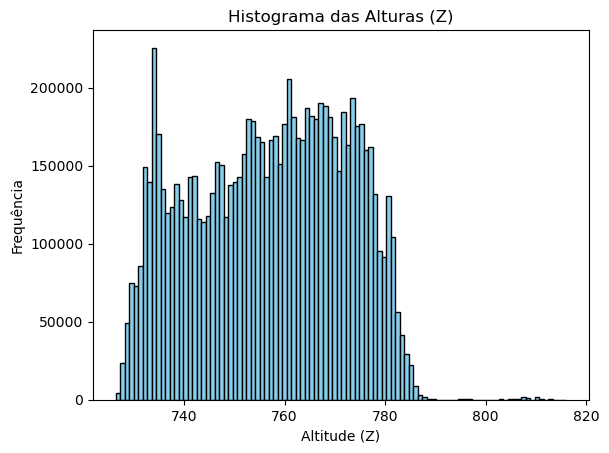

In [9]:
import matplotlib.pyplot as plt

# Extrai os valores de altura (Z) dos metadados
z_values = pipeline.arrays[0]['Z']

plt.hist(z_values, bins=100, color='skyblue', edgecolor='black')
plt.title('Histograma das Alturas (Z)')
plt.xlabel('Altitude (Z)')
plt.ylabel('Frequência')
plt.show()

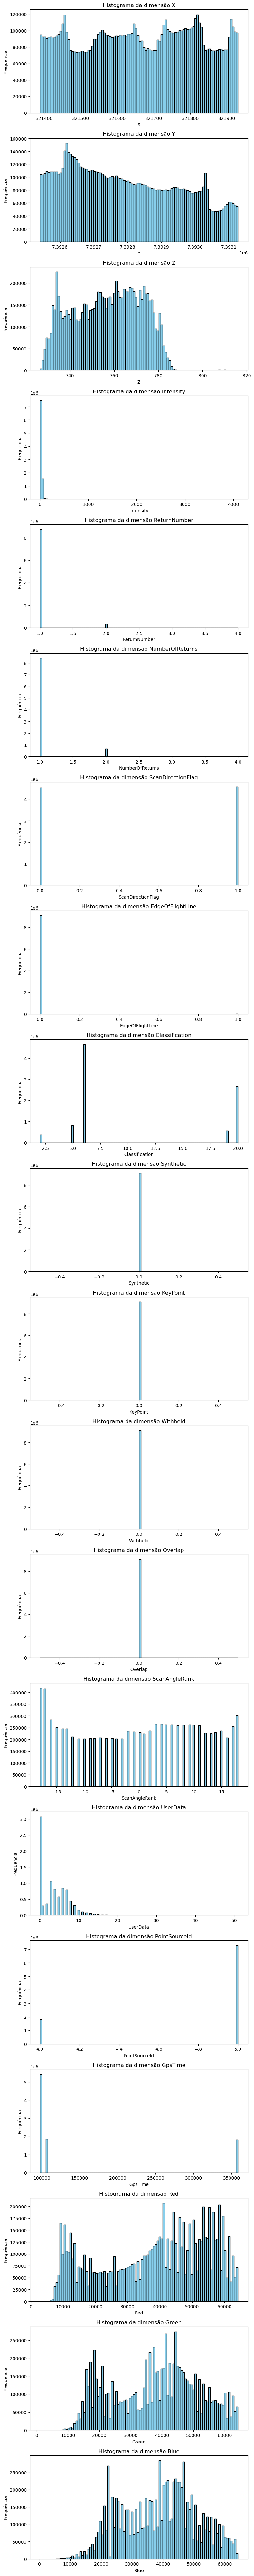

In [10]:
# Obtém todas as dimensões presentes nos dados do pipeline
dimensions = pipeline.arrays[0].dtype.names

# Gera um histograma para cada dimensão
fig, axes = plt.subplots(len(dimensions), 1, figsize=(8, 4 * len(dimensions)))
if len(dimensions) == 1:
    axes = [axes]

for ax, dim in zip(axes, dimensions):
    values = pipeline.arrays[0][dim]
    ax.hist(values, bins=100, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma da dimensão {dim}')
    ax.set_xlabel(dim)
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()